# Práctica 3. Procesamiento de imágenes


1. El negativo de una imagen es el resultado de aplicar la siguiente operación: 255-imagen(i,j). Aplica esta operación sobre la `imagen2.png` y, posteriormente, crea un video que vaya mezclando las dos imágenes por columnas, de forma que aparezca primero el negativo de la imagen y vaya apareciendo poco a poco la imagen original. El número de iteraciones debe ser igual al ancho de la imagen y en cada una se debe ir desplazando una columna a la derecha la imagen original sobre el negativo. Guarda el vídeo con el nombre `vídeo2.mp4`. (1.0 puntos)

In [21]:
import cv2 as cv

imagen = cv.imread('images/imagen2.png')
if imagen is None:
    raise FileNotFoundError("No se encontró 'imagen2.png'.")

negativo = 255 - imagen
alto, ancho, canales = imagen.shape

fps = 30
fourcc = cv.VideoWriter_fourcc(*'mp4v')
out = cv.VideoWriter('output/video2.mp4', fourcc, fps, (ancho, alto))

for i in range(ancho + 1):
    frame = negativo.copy()
    frame[:, :i] = imagen[:, :i]
    out.write(frame)

out.release()
cv.destroyAllWindows()

print("Vídeo 'video2.mp4' creado correctamente.")


Vídeo 'video2.mp4' creado correctamente.


2. Desarrolla una pequeña aplicación que mediante trackbars permita hacer transformaciones en el rango dinámico (logarítmica y exponencial) seleccionando la intensidad de la compresión/expansión. Selecciona dos imágenes donde el efecto de ambas transformaciones se perciba claramente. (1.0 punto)

In [22]:
import cv2
import numpy as np

# --- Funciones de transformación ---
def log_transform(img, c):
    img_float = img.astype(np.float32) / 255.0
    result = c * np.log1p(img_float)
    result = np.uint8(255 * result / np.max(result))
    return result

def exp_transform(img, c):
    img_float = img.astype(np.float32) / 255.0
    result = np.expm1(c * img_float)
    result = np.uint8(255 * result / np.max(result))
    return result

# --- Callback de trackbars ---
def update(_=None):
    c_val = cv2.getTrackbarPos('Intensidad', 'Transformaciones') / 10.0
    modo = cv2.getTrackbarPos('Modo (0=Log,1=Exp)', 'Transformaciones')
    
    if modo == 0:
        transformada = log_transform(img, c_val)
        texto = f"Transformación Logarítmica (c={c_val:.1f})"
    else:
        transformada = exp_transform(img, c_val)
        texto = f"Transformación Exponencial (c={c_val:.1f})"
    
    vista = np.hstack((img, transformada))
    cv2.putText(vista, texto, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)
    cv2.imshow('Transformaciones', vista)

# --- Cargar imagen ---
img = cv2.imread('images/manzana.png', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("No se encontró la imagen 'imagen1.png'. Coloca tu imagen en la carpeta actual.")

# --- Crear ventana y trackbars ---
cv2.namedWindow('Transformaciones')
cv2.createTrackbar('Intensidad', 'Transformaciones', 10, 50, update)  # c de 0.0 a 5.0
cv2.createTrackbar('Modo (0=Log,1=Exp)', 'Transformaciones', 0, 1, update)

update()  # inicializa la vista

print("Usa las trackbars para cambiar la intensidad y el tipo de transformación (0=Log, 1=Exp).")
print("Pulsa ESC para salir.")

# --- Loop principal ---
while True:
    if cv2.waitKey(1) & 0xFF == 27:  # tecla ESC
        break

cv2.destroyAllWindows()


error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:868: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


Usa las trackbars para cambiar la intensidad y el tipo de transformación (0=Log, 1=Exp).
Pulsa ESC para salir.


3. Mezcla las imágenes `imagen7_1.jpg` e `imagen7_2.png` de forma no lineal utilizando la siguiente expresión:

$$
I_3 = \frac{1 + \cos\left(\frac{\alpha}{180}\pi\right)}{2} I_1 + \frac{1 - \cos\left(\frac{\alpha}{180}\pi\right)}{2} I_2
$$ 

   Crea un vídeo de 360 frames aumentando el ángulo en 1° en cada iteración y guárdalo con el nombre de `video7.mp4`. (1.0 punto)


In [23]:
import cv2
import numpy as np

# --- Cargar las imágenes ---
img1 = cv2.imread('images/imagen7_1.jpg')
img2 = cv2.imread('images/imagen7_2.png')

if img1 is None or img2 is None:
    raise FileNotFoundError("No se encontró 'imagen7_1.jpg' o 'imagen7_2.png'")

# Redimensionar la segunda imagen al tamaño de la primera (por si difieren)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Convertir a tipo float para las operaciones
I1 = img1.astype(np.float32)
I2 = img2.astype(np.float32)

# --- Configurar el vídeo de salida ---
fps = 30
output_name = 'output/video7.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(output_name, fourcc, fps, (I1.shape[1], I1.shape[0]))

# --- Generar los 360 frames ---
for alpha in range(360):
    # Calcular coeficientes según la fórmula dada
    cos_term = np.cos((alpha / 180) * np.pi)
    w1 = (1 + cos_term) / 2
    w2 = (1 - cos_term) / 2

    # Mezcla no lineal
    I3 = w1 * I1 + w2 * I2

    # Convertir a uint8
    frame = np.uint8(np.clip(I3, 0, 255))

    # Escribir frame en el video
    video.write(frame)

# --- Finalizar ---
video.release()
cv2.destroyAllWindows()
print("Vídeo generado correctamente como 'video7.mp4'")


Vídeo generado correctamente como 'video7.mp4'


4. Obtén el ecualizado del histograma de la imagen `imagen3.png`. (0.5 puntos).

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12984\2772592947.py:20: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0,256])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12984\2772592947.py:24: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(ecualizada.ravel(), 256, [0,256])


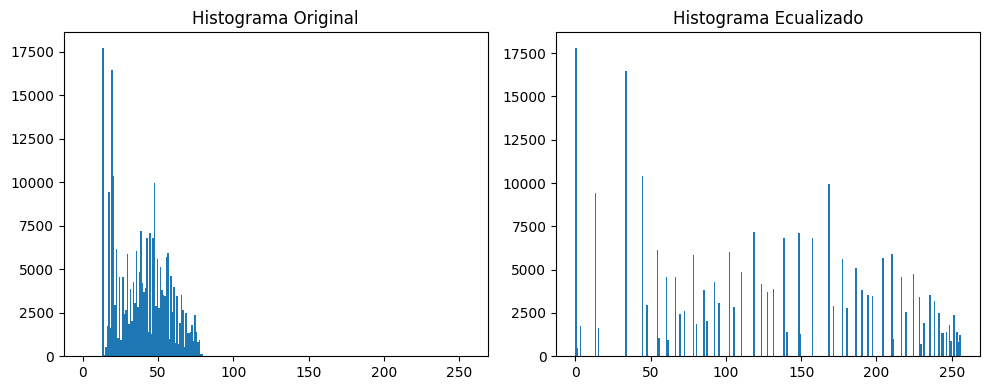

Imagen ecualizada guardada como 'imagen3_ecualizada.png'


In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# --- Cargar imagen ---
img = cv2.imread('images/imagen3.png', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("No se encontró 'imagen3.png'")

# --- Ecualización del histograma ---
ecualizada = cv2.equalizeHist(img)

# --- Mostrar resultados lado a lado ---
cv2.imshow('Original', img)
cv2.imshow('Ecualizada', ecualizada)

# --- Mostrar histogramas usando matplotlib ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(img.ravel(), 256, [0,256])
plt.title('Histograma Original')

plt.subplot(1,2,2)
plt.hist(ecualizada.ravel(), 256, [0,256])
plt.title('Histograma Ecualizado')

plt.tight_layout()
plt.show()

# --- Guardar resultado ---
cv2.imwrite('output/imagen3_ecualizada.png', ecualizada)

cv2.waitKey(0)
cv2.destroyAllWindows()
print("Imagen ecualizada guardada como 'imagen3_ecualizada.png'")


5. Elimina el ruido de la imagen resultado del paso 4 utilizando un filtro bilateral con un diámetro d=10 y valores de sigma de 11 y 11. Guarda el resultado como `imagen3_salida.png`. (0.5 puntos)

In [25]:
import cv2

# --- Cargar la imagen ecualizada ---
img_eq = cv2.imread('output/imagen3_ecualizada.png', cv2.IMREAD_GRAYSCALE)
if img_eq is None:
    raise FileNotFoundError("No se encontró 'imagen3_ecualizada.png'. Asegúrate de ejecutar antes el ejercicio 4.")

# --- Aplicar filtro bilateral ---
# Parámetros: d=10, sigmaColor=11, sigmaSpace=11
img_filtrada = cv2.bilateralFilter(img_eq, d=10, sigmaColor=50, sigmaSpace=50)

# --- Mostrar resultados ---
cv2.imshow('Ecualizada (Entrada)', img_eq)
cv2.imshow('Filtrada (Salida)', img_filtrada)

# --- Guardar resultado ---
cv2.imwrite('output/imagen3_salida.png', img_filtrada)

cv2.waitKey(0)
cv2.destroyAllWindows()
print("Imagen filtrada guardada como 'imagen3_salida.png'")


Imagen filtrada guardada como 'imagen3_salida.png'


6. Calcula la norma del gradiente de la `imagen5.jpg` utilizando los operadores de Sobel. Umbraliza los valores de la norma de forma que los valores mayores o iguales a 128 se igualen a 255 y los menores de 128 se igualen a 0. Finalmente, aplica un filtro Gaussiano de radio (7,7) con sigma=-1. Guarda el resultado con el nombre `imagen5_salida.png`. (1.5 puntos)

In [26]:
import cv2
import numpy as np

# --- 1. Cargar la imagen ---
img = cv2.imread('images/imagen5.png', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("No se encontró 'imagen5.jpg'")

# --- 2. Calcular gradientes con Sobel ---
# dx y dy: derivadas en X e Y
grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# --- 3. Calcular norma del gradiente ---
norma = np.sqrt(grad_x**2 + grad_y**2)

# Normalizar a rango [0,255] para visualizar correctamente
norma = cv2.normalize(norma, None, 0, 255, cv2.NORM_MINMAX)
norma = np.uint8(norma)

# --- 4. Umbralizar: >=128 → 255, <128 → 0 ---
_, umbralizada = cv2.threshold(norma, 128, 255, cv2.THRESH_BINARY)

# --- 5. Aplicar filtro Gaussiano (radio 7x7, sigma = -1) ---
# sigma = -1 → OpenCV lo calcula automáticamente en función del kernel
suavizada = cv2.GaussianBlur(umbralizada, (7, 7), sigmaX=-1)

# --- 6. Mostrar y guardar resultado ---
cv2.imshow('Original', img)
cv2.imshow('Norma del Gradiente', norma)
cv2.imshow('Umbralizada', umbralizada)
cv2.imshow('Suavizada Final', suavizada)

cv2.imwrite('output/imagen5_salida.png', suavizada)

cv2.waitKey(0)
cv2.destroyAllWindows()

print("Resultado guardado como 'imagen5_salida.png'")


Resultado guardado como 'imagen5_salida.png'


7. Con la `imagen4.jpg`, crea un vídeo de 100 frames aplicando un filtro mediano de radio (ksize) igual a 7. Aplica el filtro en cada iteración al resultado de la iteración anterior. Guarda el vídeo con el nombre `video4.mp4`. (0.5 puntos)

In [27]:
import cv2
import numpy as np

# --- 1. Cargar la imagen ---
img = cv2.imread('images/imagen4.jpg')
if img is None:
    raise FileNotFoundError("No se encontró 'imagen4.jpg'")

# --- 2. Configurar el vídeo de salida ---
fps = 30
nombre_video = 'output/video4.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
alto, ancho, canales = img.shape
video = cv2.VideoWriter(nombre_video, fourcc, fps, (ancho, alto))

# --- 3. Aplicar filtro mediano iterativamente ---
frame_actual = img.copy()

for i in range(100):
    # Aplicar filtro mediano sobre el resultado anterior
    frame_actual = cv2.medianBlur(frame_actual, ksize=7)
    
    # Escribir frame en el video
    video.write(frame_actual)
    
    # (Opcional) mostrar progreso por consola
    print(f"Frame {i+1}/100 generado")

# --- 4. Liberar recursos ---
video.release()
cv2.destroyAllWindows()
print("Vídeo guardado correctamente como 'video4.mp4'")


Frame 1/100 generado
Frame 2/100 generado
Frame 3/100 generado
Frame 4/100 generado
Frame 5/100 generado
Frame 6/100 generado
Frame 7/100 generado
Frame 8/100 generado
Frame 9/100 generado
Frame 10/100 generado
Frame 11/100 generado
Frame 12/100 generado
Frame 13/100 generado
Frame 14/100 generado
Frame 15/100 generado
Frame 16/100 generado
Frame 17/100 generado
Frame 18/100 generado
Frame 19/100 generado
Frame 20/100 generado
Frame 21/100 generado
Frame 22/100 generado
Frame 23/100 generado
Frame 24/100 generado
Frame 25/100 generado
Frame 26/100 generado
Frame 27/100 generado
Frame 28/100 generado
Frame 29/100 generado
Frame 30/100 generado
Frame 31/100 generado
Frame 32/100 generado
Frame 33/100 generado
Frame 34/100 generado
Frame 35/100 generado
Frame 36/100 generado
Frame 37/100 generado
Frame 38/100 generado
Frame 39/100 generado
Frame 40/100 generado
Frame 41/100 generado
Frame 42/100 generado
Frame 43/100 generado
Frame 44/100 generado
Frame 45/100 generado
Frame 46/100 genera

8. Elimina el ruido de la imagen6.png aplicando todos los algoritmos vistos en clase para este fin. Si es necesario aplica los filtros múltiples veces para eliminar el ruido lo mejor posible. Haz un breve estudio comparativo entre las técnicas y selecciona el mejor resultado. (1 punto) NO MEZCLAR FILTROS

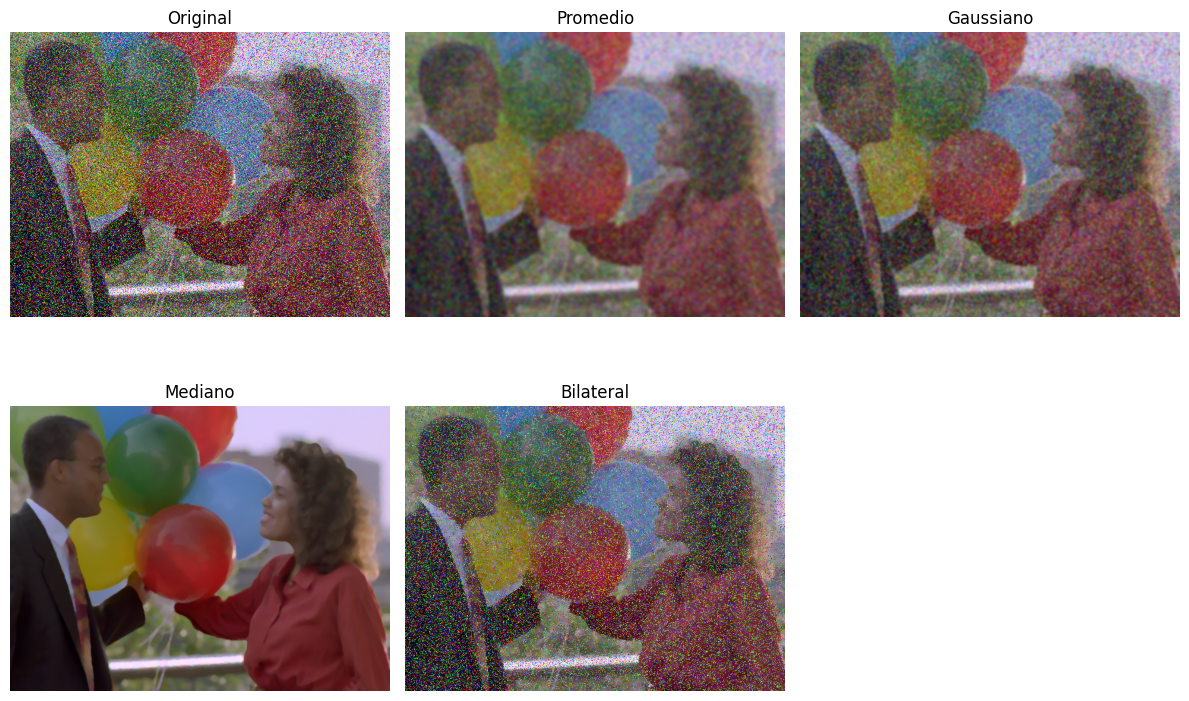

Imágenes filtradas guardadas: promedio, gaussiano, mediano y bilateral


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# --- 1. Cargar la imagen ---
img = cv2.imread('images/imagen6.png')
if img is None:
    raise FileNotFoundError("No se encontró 'imagen6.png'")

# --- 2. Aplicar diferentes filtros de eliminación de ruido ---

# Filtro promedio (blur)
blur = img.copy()
for _ in range(3):  # aplicar varias veces para reforzar efecto
    blur = cv2.blur(blur, (5, 5))

# Filtro Gaussiano
gauss = img.copy()
for _ in range(3):
    gauss = cv2.GaussianBlur(gauss, (5, 5), sigmaX=0)

# Filtro mediano
median = img.copy()
for _ in range(3):
    median = cv2.medianBlur(median, 5)

# Filtro bilateral
bilateral = img.copy()
for _ in range(2):  # el bilateral es más caro, con 2 basta
    bilateral = cv2.bilateralFilter(bilateral, d=9, sigmaColor=75, sigmaSpace=75)

# --- 3. Mostrar resultados ---
titles = ['Original', 'Promedio', 'Gaussiano', 'Mediano', 'Bilateral']
images = [img, blur, gauss, median, bilateral]

plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

# --- 4. Guardar resultados ---
cv2.imwrite('output/imagen6_promedio.png', blur)
cv2.imwrite('output/imagen6_gaussiano.png', gauss)
cv2.imwrite('output/imagen6_mediano.png', median)
cv2.imwrite('output/imagen6_bilateral.png', bilateral)

print("Imágenes filtradas guardadas: promedio, gaussiano, mediano y bilateral")


9. Investiga sobre alguna técnica de filtrado distinta a las vistas en clase. Explícala y codifica un ejemplo de uso. A continuación, propón dos filtros de tu invención (lineales o no lineales) especializados en detectar bordes o eliminar ruido. (1 punto)

Filtro Non-Local Means Denoising (NLM)

In [30]:
import cv2
import numpy as np

# Cargar imagen con ruido
img = cv2.imread('images/imagen6.png')
if img is None:
    raise FileNotFoundError("No se encontró 'imagen6.png'")

# Aplicar Non-Local Means
nlm = cv2.fastNlMeansDenoisingColored(img, None,
                                      h=10,          # intensidad de filtrado luminancia
                                      hColor=10,     # intensidad de filtrado color
                                      templateWindowSize=7,
                                      searchWindowSize=21)

# Mostrar comparación
cv2.imshow('Original', img)
cv2.imshow('Non-Local Means', nlm)
cv2.imwrite('output/imagen6_nlm.png', nlm)

cv2.waitKey(0)
cv2.destroyAllWindows()


Dos filtros de invención propia

Filtro 1 — “EdgePulse”: Detector de bordes con realce de contraste


In [ ]:
# EdgePulse Filter
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gx = cv2.Sobel(img_gray, cv2.CV_32F, 1, 0, ksize=3)
gy = cv2.Sobel(img_gray, cv2.CV_32F, 0, 1, ksize=3)
grad = cv2.magnitude(gx, gy)

# Realce de contraste basado en gradiente
factor = 1 + (grad / grad.max()) * 2.0
edgepulse = np.clip(img_gray * factor, 0, 255).astype(np.uint8)

cv2.imshow('EdgePulse', edgepulse)
cv2.imwrite('output/imagen6_edgepulse.png', edgepulse)


True

: 


Filtro 2 — “SmartMedian”: Eliminador adaptativo de ruido impulsivo

In [ ]:
# SmartMedian Filter
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
median = cv2.medianBlur(img_gray, 5)

# Umbral de diferencia con la mediana
diff = cv2.absdiff(img_gray, median)
mask = diff > 25   # si hay gran diferencia, se sustituye

smart_median = img_gray.copy()
smart_median[mask] = median[mask]

cv2.imshow('SmartMedian', smart_median)
cv2.imwrite('output/imagen6_smartmedian.png', smart_median)
